## Domain Knowledge

### Dataset Features

Age: Patient's age (in years). Age is a critical factor in assessing diabetes risk, with older individuals often having a higher likelihood of developing the condition.

Gender: Patient's gender (Male/Female/Other). Certain studies suggest differences in diabetes prevalence between genders.

BMI (Body Mass Index): A measure of body fat based on weight and height. High BMI values are strongly associated with diabetes risk.

Hypertension: Indicates whether the patient has high blood pressure (Yes/No). Hypertension is a common comorbidity in diabetic patients.

Heart Disease: Presence of heart disease (Yes/No). Cardiovascular issues often correlate with diabetes.

Smoking History: Patient’s history of smoking (never, former, current). Smoking may contribute to an increased risk of diabetes and other health complications.

HbA1c Level: Hemoglobin A1c percentage, a key marker for average blood sugar levels over the past three months. Higher values indicate poorer glucose control.
Blood Glucose Level: Measured glucose level (mg/dL). Elevated levels are indicative of potential diabetes or prediabetes.

Diabetes: Target variable (Positive/Negative). Indicates whether the patient has been diagnosed with diabetes.

## Data Preprocessing

### Importing Libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

### Exploring Data

In [11]:
df = pd.read_csv('./dataset/diabetes_prediction_dataset.csv')

In [12]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.00,0,0,No Info,27.32,6.20,90,0
99996,Female,2.00,0,0,No Info,17.37,6.50,100,0
99997,Male,66.00,0,0,former,27.83,5.70,155,0
99998,Female,24.00,0,0,never,35.42,4.00,100,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [14]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.09
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.00,41.89,22.52,0.08,24.00,43.00,60.00,80.00
hypertension,100000.00,0.07,0.26,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.00,0.04,0.19,0.00,0.00,0.00,0.00,1.00
bmi,100000.00,27.32,6.64,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.00,5.53,1.07,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.00,138.06,40.71,80.00,100.00,140.00,159.00,300.00
diabetes,100000.00,0.09,0.28,0.00,0.00,0.00,0.00,1.00


### Checking null values

In [16]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### Checking duplicate values

In [17]:
df.duplicated().sum()

3854

In [18]:
df_copy = df.copy()

df_copy = df_copy.drop_duplicates()

df_copy

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.00,0,0,No Info,24.60,4.80,145,0
99996,Female,2.00,0,0,No Info,17.37,6.50,100,0
99997,Male,66.00,0,0,former,27.83,5.70,155,0
99998,Female,24.00,0,0,never,35.42,4.00,100,0


In [19]:
# incode the data
le = LabelEncoder()
df_copy['gender'] = le.fit_transform(df_copy['gender'])
df_copy['smoking_history'] = le.fit_transform(df_copy['smoking_history'])

## EXPOLATORY DATA ANALYSIS (EDA)

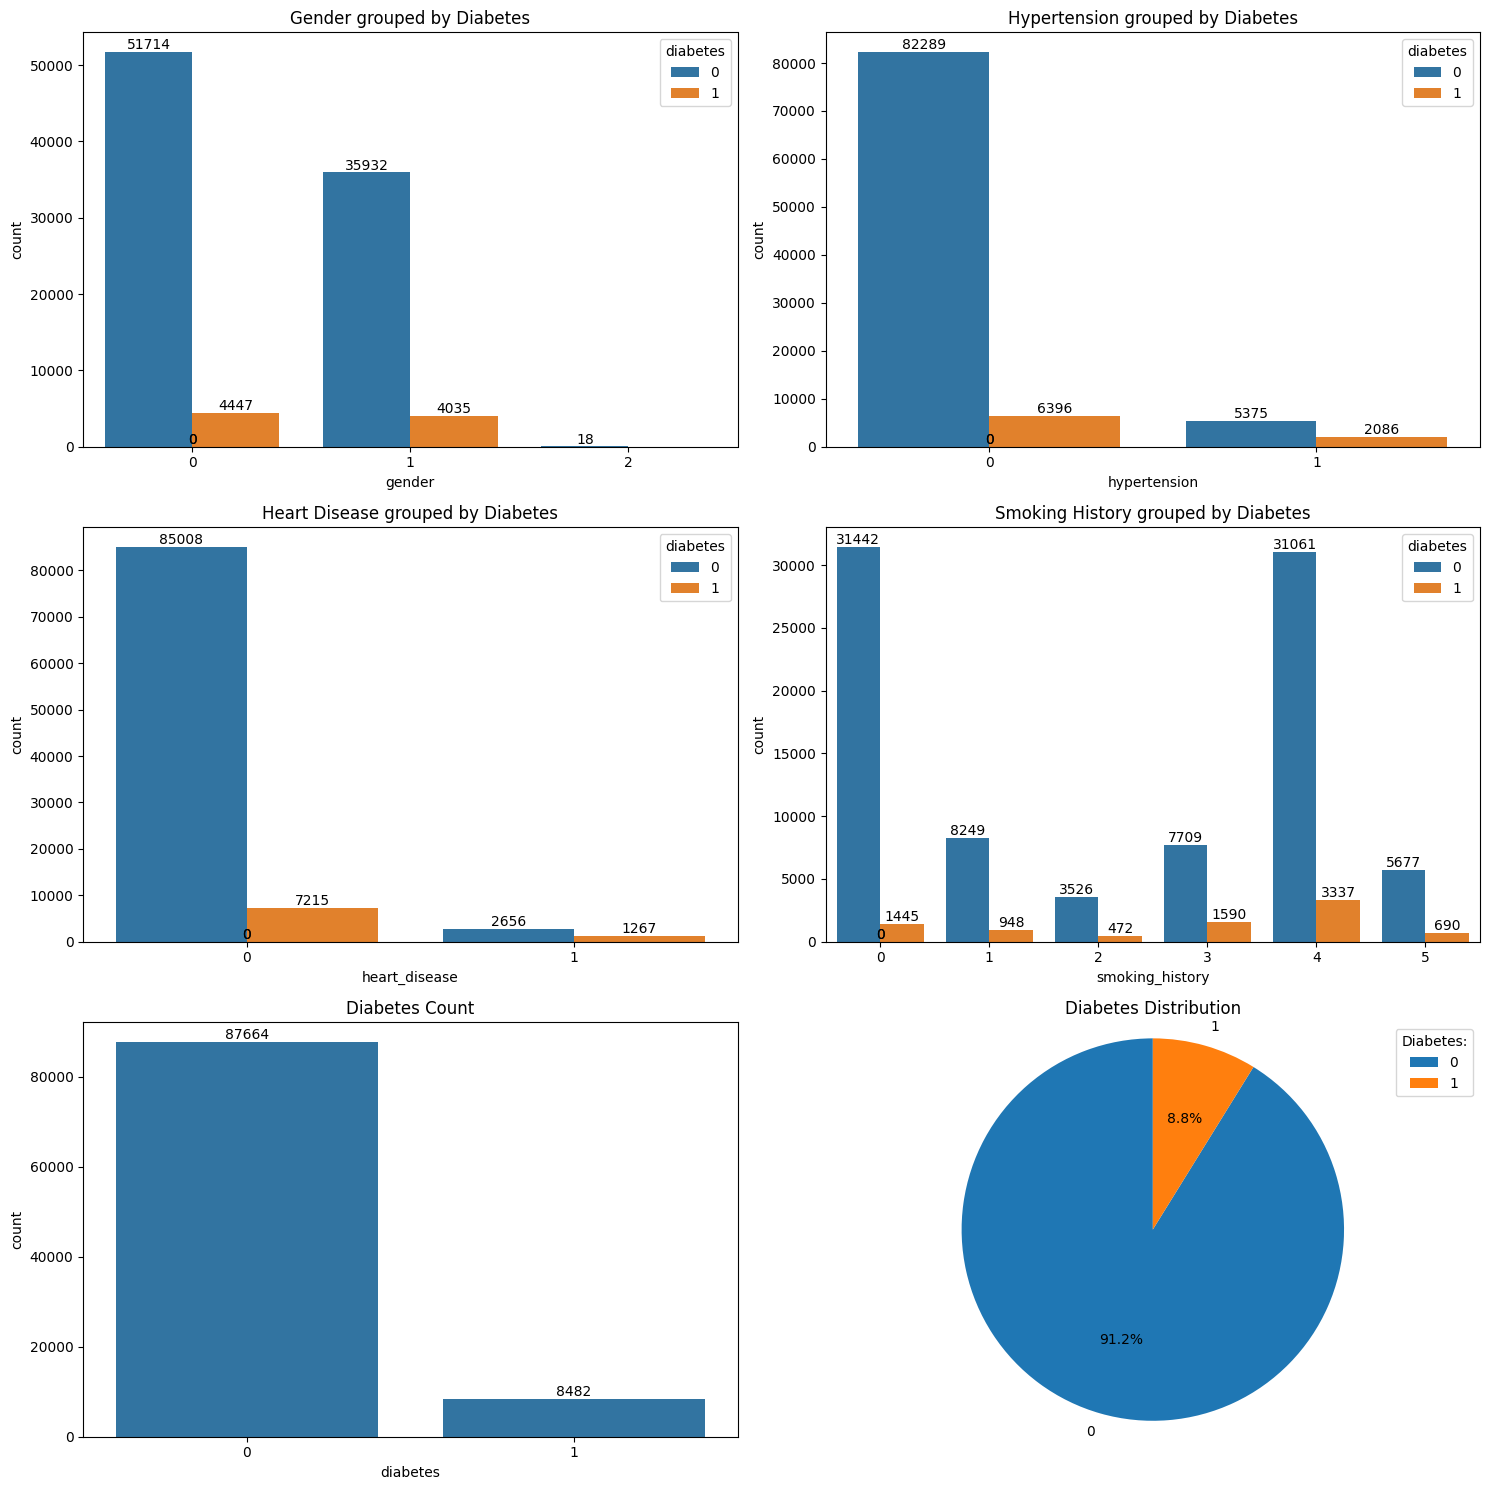

diabetes
0    87664
1     8482
Name: count, dtype: int64

In [21]:
diabetes_counts = df_copy['diabetes'].value_counts()

# Function to add counts on bars
def add_counts(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 2, figsize=(15, 15))


# Plot gender grouped by diabetes
ax = sns.countplot(ax=axes[0, 0], x='gender', hue='diabetes', data=df_copy)
axes[0, 0].set_title('Gender grouped by Diabetes')
add_counts(ax)

# Plot hypertension grouped by diabetes
ax = sns.countplot(ax=axes[0, 1], x='hypertension', hue='diabetes', data=df_copy)
axes[0, 1].set_title('Hypertension grouped by Diabetes')
add_counts(ax)

# Plot heart disease grouped by diabetes
ax = sns.countplot(ax=axes[1, 0], x='heart_disease', hue='diabetes', data=df_copy)
axes[1, 0].set_title('Heart Disease grouped by Diabetes')
add_counts(ax)

# Plot smoking history grouped by diabetes
ax = sns.countplot(ax=axes[1, 1], x='smoking_history', hue='diabetes', data=df_copy)
axes[1, 1].set_title('Smoking History grouped by Diabetes')
add_counts(ax)

# Plot diabetes
ax = sns.countplot(ax=axes[2, 0], x='diabetes', data=df_copy)
axes[2, 0].set_title('Diabetes Count')
add_counts(ax)

# Create pie plot for diabetes
diabetes_counts = df_copy['diabetes'].value_counts()
axes[2, 1].pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90)
axes[2, 1].set_title('Diabetes Distribution')
axes[2, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[2, 1].legend(title='Diabetes:', loc='upper right')
# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

diabetes_counts

Minimum age: 0.08
Maximum age: 80.0
Average age: 41.885856
Diabetes Counts:
diabetes
0    91500
1     8500
Name: count, dtype: int64
Age Statistics by Diabetes Status:
          min   max
diabetes           
0        0.08 80.00
1        3.00 80.00


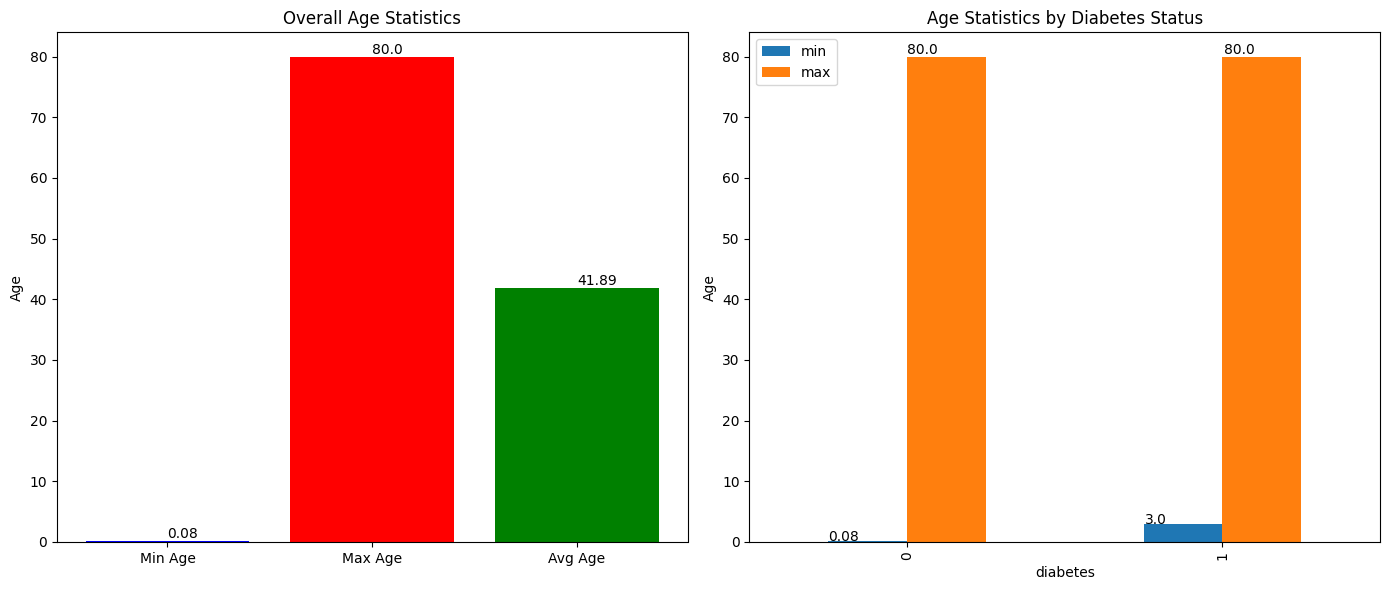

In [22]:
# Calculate minimum, maximum, and average age
min_age = df['age'].min()
max_age = df['age'].max()
avg_age = df['age'].mean()

# Count of individuals with and without diabetes
diabetes_counts = df['diabetes'].value_counts()

# Group by diabetes status and calculate min and max ages
grouped_ages = df.groupby('diabetes')['age'].agg(['min', 'max'])

# Print the results
print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")
print(f"Average age: {avg_age}")
print("Diabetes Counts:")
print(diabetes_counts)
print("Age Statistics by Diabetes Status:")
print(grouped_ages)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for overall min, max, and average age
bars = ax[0].bar(['Min Age', 'Max Age', 'Avg Age'], [min_age, max_age, avg_age], color=['blue', 'red', 'green'])
ax[0].set_title('Overall Age Statistics')
ax[0].set_ylabel('Age')

# Annotate bars with their values
for bar in bars:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # Add text to the top of the bars

# Plot for min and max ages grouped by diabetes status
grouped_bars = grouped_ages.plot(kind='bar', ax=ax[1])
ax[1].set_title('Age Statistics by Diabetes Status')
ax[1].set_ylabel('Age')

# Annotate bars with their values
for p in grouped_bars.patches:
    grouped_bars.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.tight_layout()
plt.show()

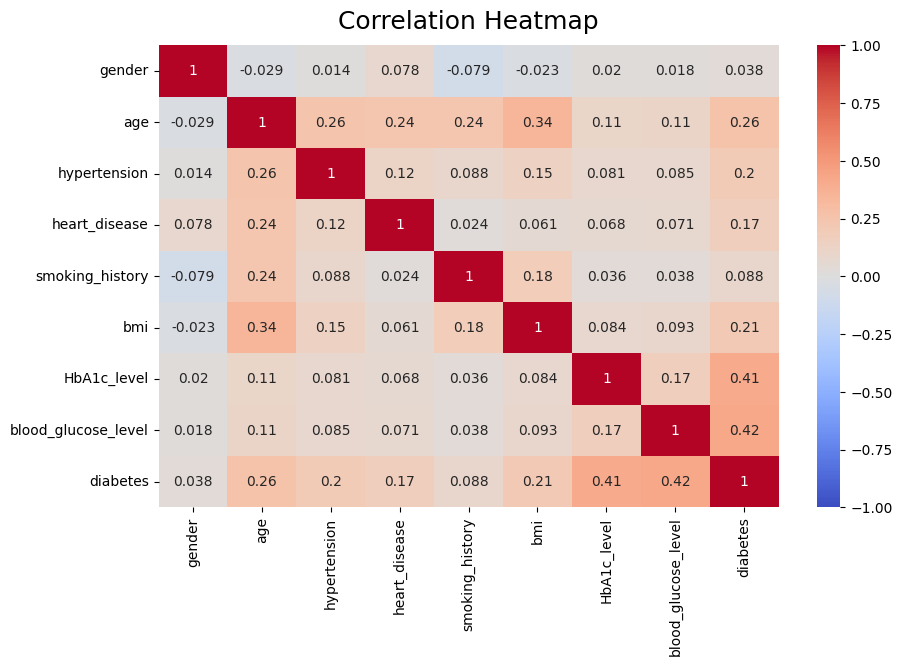

In [23]:
corr_matrix = df_copy.corr()

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)

plt.show()

In [24]:
df_copy.to_csv('./dataset/processed_dataset.csv', index=False)